- 탐색적데이터 분석 및 시각화
- train_test_split - 7:3, 2045 적용
- 단일회귀 및 다중회귀 수행
- scaling 또는 encoding 적용 (필수 x)
- 최적의 R-square, MSE 도출

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [3]:
# 'house_price.csv' from github

df_hp = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/house_price.csv')


df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


# 1. 탐색적 데이터분석 및 시각화


In [4]:
df_hp.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [8]:
df_hp['neighborhood'].value_counts()

B    2427
A    1876
C    1725
Name: neighborhood, dtype: int64

In [7]:
df_hp['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

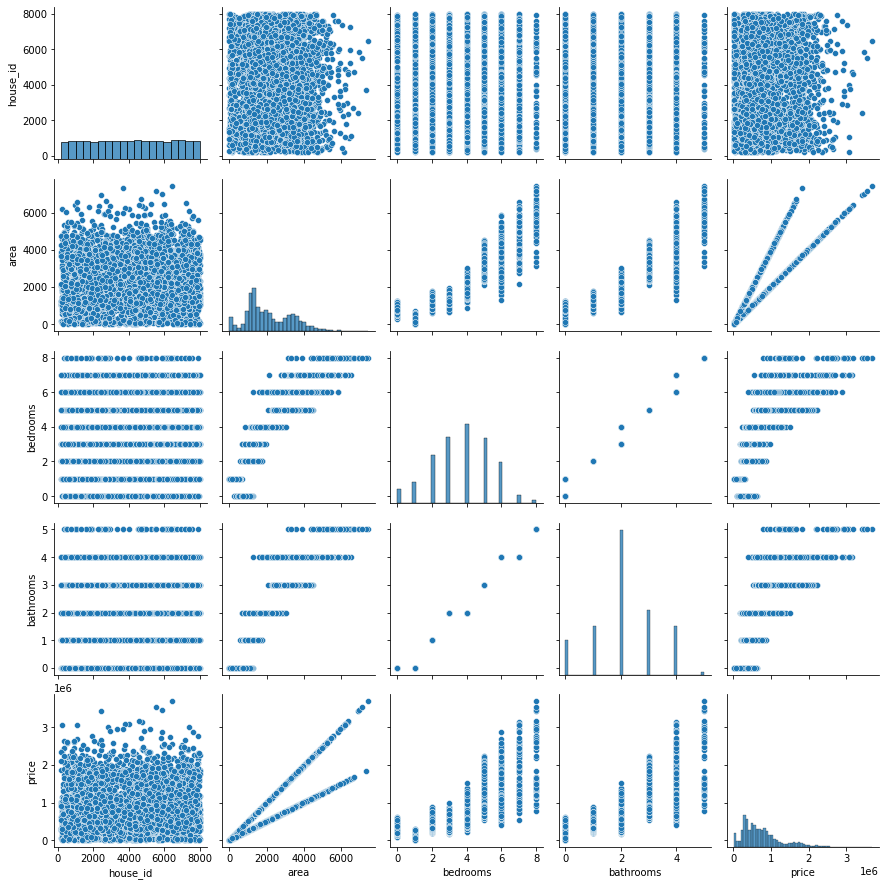

In [9]:
sns.pairplot(df_hp)
plt.show()

# price 는 area, bedrooms, bathrooms 와 양의 상관관계
# bedroom 과 bathroom 도 정비례 관계

In [11]:
# 상관계수 확인
# price vs. area

stats.pearsonr(df_hp.price, df_hp.area)[0]

0.8234537182735618

In [13]:
# price vs. bedrooms

stats.pearsonr(df_hp.price, df_hp.bedrooms)[0]

0.7434351418523943

In [14]:
# price vs. bathrooms

stats.pearsonr(df_hp.price, df_hp.bathrooms)[0]

0.7358511123795443

In [16]:
# scaling을 위한 area, bedrooms, bathrooms 값 확인

print('area: ' , df_hp.area[:5])
print('bedrooms: ' , df_hp.bedrooms[:5])
print('bathrooms: ' , df_hp.bathrooms[:5])

area:  0    1188
1    3512
2    1134
3    1940
4    2208
Name: area, dtype: int64
bedrooms:  0    3
1    5
2    3
3    4
4    6
Name: bedrooms, dtype: int64
bathrooms:  0    2
1    3
2    2
3    2
4    4
Name: bathrooms, dtype: int64


# 2. Train, test split

### 2-1. 상관계수가 제일 높은 area로 단일회귀

#### 1) train, test split 7:3

In [74]:
X = df_hp[['area']]
y = df_hp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (4219, 1) (4219,)
Test Data:  (1809, 1) (1809,)


#### 2) area scaling

In [75]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [76]:
# MinMaxScaler를 사용해 스케일 조정
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# 스케일 조정된 값 확인
X_train_scaled[:5]

array([[0.22599705],
       [0.35557943],
       [0.35450517],
       [0.28709547],
       [0.20934605]])

In [78]:
X_test_scaled[:5]

array([[0.51953807],
       [0.48784746],
       [0.48180475],
       [0.19242648],
       [0.28400698]])

#### 3) 모델 생성

In [79]:
LR_area = LinearRegression()
LR_area.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 4) Weight 및 Bias 확인

In [80]:
print('weight(w): ' , LR_area.coef_)
print('bias(b): ' , LR_area.intercept_)

weight(w):  [2601190.75633969]
bias(b):  7885.392941941274


#### 5) 모델평가: R-square

In [82]:
LR_area.score(X_test_scaled, y_test)

0.6784229855524156

####6) 모델 평가: MSE

In [83]:
y_hat = LR_area.predict(X_test_scaled)

mean_squared_error(y_test, y_hat)

88607832178.18301

### 2-2. Area로 다항회귀
- 큰 의미는 없어보인다

####1) 다항 가능하게 X_train_scaled 변경

In [37]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)

print(X_train_scaled.shape)
print(X_train_scaled_poly.shape)

(4219, 1)
(4219, 2)


####2) High-Order 모델 생성

In [38]:
LR_area_poly = LinearRegression()
LR_area_poly.fit(X_train_scaled_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print('w: ' , LR_area_poly.coef_)
print('b: ' , '%.8f' %LR_area_poly.intercept_)

w:  [2426525.47260977  257898.64763246]
b:  29697.22204200


#### 3) 모델평가: R-square

In [41]:
X_test_scaled_poly = poly.fit_transform(X_test_scaled)
LR_area_poly.score(X_test_scaled_poly, y_test)

0.6778047487989153

#### 4) 모델평가: MSE

In [84]:
y_hat_poly = LR_area_poly.predict(X_test_scaled_poly)

mean_squared_error(y_test, y_hat_poly)

88778182097.60945

#### 5) Visualization

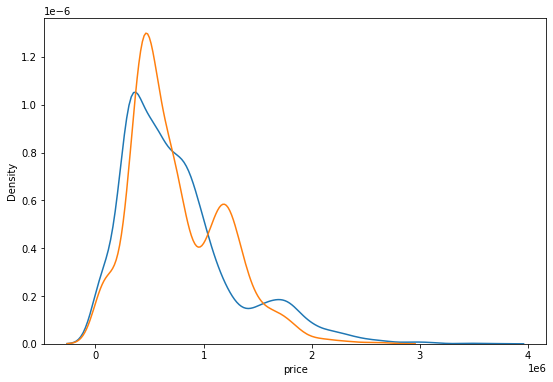

In [85]:
plt.figure(figsize = (9, 6))

ax1 = sns.distplot(y, hist = False , label = 'y')
ax2 = sns.distplot(y_hat_poly, hist = False, label = 'y_hat' , ax = ax1)

plt.show()

### 3. 다중회귀: area, bathroom 사용

In [43]:
X = df_hp[['area', 'bathrooms', 'bedrooms']]
y = df_hp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (4219, 3) (4219,)
Test Data:  (1809, 3) (1809,)


In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
# MinMaxScaler를 사용해 스케일 조정
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# 스케일 조정된 값 확인
X_train_scaled[:5]

array([[0.22599705, 0.4       , 0.5       ],
       [0.35557943, 0.4       , 0.5       ],
       [0.35450517, 0.8       , 0.75      ],
       [0.28709547, 0.4       , 0.5       ],
       [0.20934605, 0.2       , 0.25      ]])

In [47]:
X_test_scaled[:5]

array([[0.51953807, 0.8       , 0.75      ],
       [0.48784746, 0.8       , 0.75      ],
       [0.48180475, 0.6       , 0.625     ],
       [0.19242648, 0.4       , 0.375     ],
       [0.28400698, 0.4       , 0.5       ]])

- 모델 생성

In [49]:
LR_multi = LinearRegression()
LR_multi.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
print('w: ' , LR_multi.coef_)
print('b: ' , '%.8f' %LR_multi.intercept_)

w:  [2577247.04601659   91036.56427996  -78282.4292832 ]
b:  11743.96746589


- 결정계수

In [52]:
LR_multi.score(X_test_scaled, y_test)

0.6781719844487373

- 모델 평가

In [53]:
mean_squared_error(y_test, LR_multi.predict(X_test_scaled))

88676993413.81882

## 3. encoding

In [97]:
encoder = LabelEncoder()

df_hp['neighborhood'] = encoder.fit_transform(df_hp['neighborhood'])
df_hp['style'] = encoder.fit_transform(df_hp['style'])

In [98]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   house_id      6028 non-null   int64
 1   neighborhood  6028 non-null   int64
 2   area          6028 non-null   int64
 3   bedrooms      6028 non-null   int64
 4   bathrooms     6028 non-null   int64
 5   style         6028 non-null   int64
 6   price         6028 non-null   int64
dtypes: int64(7)
memory usage: 329.8 KB


In [99]:
df_hp.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,1,1188,3,2,1,598291
1,491,1,3512,5,3,2,1744259
2,5952,1,1134,3,2,1,571669
3,3525,0,1940,4,2,1,493675
4,5108,1,2208,6,4,2,1101539


### 1) Visualization

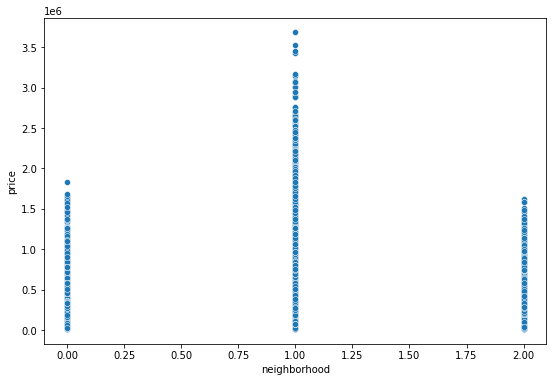

In [100]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = 'neighborhood',
                y = 'price',
                data = df_hp)
plt.show()

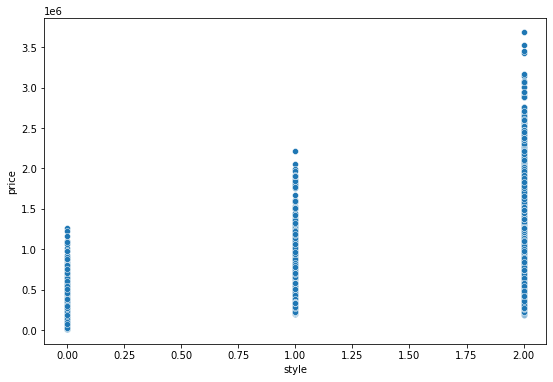

In [101]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = 'style',
                y = 'price',
                data = df_hp)
plt.show()

In [108]:
X = df_hp[['style']]
y = df_hp['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3 ,
                                                    random_state = 2045)

print('Train Data: ' , X_train.shape, y_train.shape)
print('Test Data: ' , X_test.shape, y_test.shape)

Train Data:  (4219, 1) (4219,)
Test Data:  (1809, 1) (1809,)


### 2) .fit()

In [109]:
LR_st = LinearRegression()
LR_st.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3) .predict()

In [110]:
y_hat_st = LR_st.predict(X_test)

### 4) MSE, R-square

In [111]:
mse_st = mean_squared_error(y_test, y_hat_st)

mse_st

185367393986.7433

In [112]:
LR_st.score(X_test, y_test)

0.3272615787020332